In [4]:
#You are hired by NASA as a Data Scientist, Congratulations!
#your first project;  you have to classify stars based on their astornomical measurements,  0 non-pulsar, 1-pulsar
#luckily astronouts gave you a dataset after making observations through our Galaxy
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours
#which ML model gives the best?
#Because you are working in NASA, they have very clean dataset(there is no preprocessing!)
#to learn more about pulsars
#you will find your dataset inside the rar file named as "pulsar_stars.csv"
#  https://www.nasa.gov/mission_pages/GLAST/science/neutron_stars.html

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

StarsDataset = pd.read_csv('pulsar_stars.csv')
StarsDataset.tail(10)

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
17888,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
17889,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
17890,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
17891,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
17892,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [6]:
StarsDataset.isnull().sum()

Mean_of_the_integrated_profile                  0
Standard_deviation_of_the_integrated_profile    0
Excess_kurtosis_of_the_integrated_profile       0
Skewness_of_the_integrated_profile              0
Mean_of_the_DM_SNR_curve                        0
Standard_deviation_of_the_DM_SNR_curve          0
 Excess_kurtosis_of_the_DM_SNR_curve            0
 Skewness_of_the_DM_SNR_curve                   0
target_class                                    0
dtype: int64

In [7]:
x_data = StarsDataset.drop('target_class', axis=1)
y = StarsDataset['target_class']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, shuffle = True)
# print("X_train")
# print(X_train.head(3))
print("y_train")
print(y_train.head(3))

print("X_test")
print(X_test.head(3))
print("y_test")
print(y_test.head(3))
scaler = MinMaxScaler()
scaler.fit(X_train)

y_train
1352     0
9109     0
11365    0
Name: target_class, dtype: int64
X_test
      Mean_of_the_integrated_profile  \
5253                      120.437500   
7719                       23.804688   
9747                      128.601562   

      Standard_deviation_of_the_integrated_profile  \
5253                                     52.428486   
7719                                     41.677905   
9747                                     43.864554   

      Excess_kurtosis_of_the_integrated_profile  \
5253                                  -0.098114   
7719                                   3.938470   
9747                                   0.252631   

      Skewness_of_the_integrated_profile  Mean_of_the_DM_SNR_curve  \
5253                           -0.386378                  3.379599   
7719                           15.420309                108.270903   
9747                            0.303181                 48.479097   

      Standard_deviation_of_the_DM_SNR_curve  \
5253   

MinMaxScaler()

In [13]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)
print(X_train.head(3))

       Mean_of_the_integrated_profile  \
1352                         0.519970   
9109                         0.474635   
11365                        0.555226   

       Standard_deviation_of_the_integrated_profile  \
1352                                       0.216129   
9109                                       0.322513   
11365                                      0.281511   

       Excess_kurtosis_of_the_integrated_profile  \
1352                                    0.243580   
9109                                    0.241792   
11365                                   0.208907   

       Skewness_of_the_integrated_profile  Mean_of_the_DM_SNR_curve  \
1352                             0.043901                  0.018743   
9109                             0.032949                  0.075857   
11365                            0.036961                  0.006811   

       Standard_deviation_of_the_DM_SNR_curve  \
1352                                 0.149367   
9109                  

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
SVC_score = precision_score(y_test,y_pred)

[[3246   14]
 [  73  247]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3260
           1       0.95      0.77      0.85       320

    accuracy                           0.98      3580
   macro avg       0.96      0.88      0.92      3580
weighted avg       0.98      0.98      0.97      3580



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))
DTC_score = precision_score(y_test,tree_pred)

[[3195   65]
 [  56  264]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3260
           1       0.80      0.82      0.81       320

    accuracy                           0.97      3580
   macro avg       0.89      0.90      0.90      3580
weighted avg       0.97      0.97      0.97      3580



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
RFC_score = precision_score(y_test,rf_pred)

[[3235   25]
 [  49  271]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3260
           1       0.92      0.85      0.88       320

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))
KN_score = precision_score(y_test,KN_pred)

[[3235   25]
 [  51  269]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3260
           1       0.91      0.84      0.88       320

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
from typing import Sequence
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(7, input_dim=8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
epochs = 400

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, verbose=1, mode='auto')
callbacks_list = [earlystop]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_early_heart=model.fit(X_train, y_train, validation_split=0.35, epochs=epochs, batch_size=128)

SEQ_score = model_without_early_heart.history.get("val_accuracy")[epochs-1]

Epoch 1/400


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


73/73 [==============================] - 1s 6ms/step - loss: 0.7634 - accuracy: 0.2395 - val_loss: 0.6681 - val_accuracy: 0.9581
Epoch 2/400
73/73 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.9398 - val_loss: 0.6362 - val_accuracy: 0.9308
Epoch 3/400
73/73 [==============================] - 0s 4ms/step - loss: 0.6229 - accuracy: 0.9406 - val_loss: 0.6086 - val_accuracy: 0.9493
Epoch 4/400
73/73 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.9533 - val_loss: 0.5804 - val_accuracy: 0.9589
Epoch 5/400
73/73 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.9610 - val_loss: 0.5513 - val_accuracy: 0.9657
Epoch 6/400
73/73 [==============================] - 0s 3ms/step - loss: 0.5376 - accuracy: 0.9665 - val_loss: 0.5222 - val_accuracy: 0.9707
Epoch 7/400
73/73 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.9683 - val_loss: 0.4942 - val_accuracy: 0.9727
Epoch 8/400
73/73 [======

In [ ]:
#You are hired by IBM Watson as a Data Scientist, Congratulations!
#Your first project;  you have to classify heart disesae  based on their medical measurements,  0 healthy, 1-heart disease
#your job is to use ML techniques as SVM, Decision_tree, Random_forest and Kneighbours (bonus if you use a Neural Network)
#which ML model gives the best?
#Because you are working in IBM Watson, they have very clean dataset(there is no preprocessing!)
#to learn more about the Heart Disease Dataset :
#  https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [ ]:
HeartsDataset = pd.read_csv('HeartDiseaseDataset.csv')
HeartsDataset.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
HeartsDataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
x_data = HeartsDataset.drop('target', axis=1)
y = HeartsDataset['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, shuffle = True)
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
276,0.690476,1.0,0.000000,0.490566,0.210046,0.0,0.5,0.259542,0.0,0.322581,0.5,0.25,1.000000
294,0.357143,1.0,0.000000,0.245283,0.098174,0.0,0.5,0.557252,1.0,0.451613,0.0,0.00,0.333333
252,0.785714,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667
51,0.880952,1.0,0.000000,0.245283,0.401826,0.0,0.0,0.610687,0.0,0.064516,0.5,0.00,0.666667
78,0.547619,1.0,0.333333,0.320755,0.180365,1.0,0.5,0.862595,0.0,0.000000,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.142857,1.0,0.000000,0.245283,0.164384,0.0,0.5,0.450382,1.0,0.258065,0.5,0.00,1.000000
63,0.285714,1.0,0.333333,0.386792,0.175799,0.0,0.5,0.465649,0.0,0.000000,0.5,0.00,0.333333
225,0.976190,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
296,0.809524,0.0,0.000000,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.5,0.00,0.666667


In [ ]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
224,0.595238,1.0,0.000000,0.150943,0.257991,0.0,0.5,0.419847,1.0,0.451613,0.5,0.25,1.000000
81,0.380952,1.0,0.333333,0.320755,0.415525,0.0,0.0,0.755725,0.0,0.000000,1.0,0.00,0.666667
77,0.714286,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667
129,1.071429,0.0,0.333333,0.245283,0.326484,0.0,0.0,0.381679,1.0,0.032258,1.0,0.25,0.666667
66,0.523810,1.0,0.666667,0.056604,0.219178,0.0,0.5,0.549618,1.0,0.193548,0.5,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.452381,1.0,0.000000,0.264151,0.219178,0.0,0.0,0.877863,0.0,0.000000,1.0,0.00,0.666667
126,0.428571,1.0,0.000000,0.169811,0.178082,0.0,0.5,0.549618,0.0,0.016129,1.0,0.00,0.666667
123,0.595238,0.0,0.666667,0.132075,0.321918,0.0,0.0,0.732824,0.0,0.000000,1.0,0.00,0.666667
182,0.761905,0.0,0.000000,0.339623,0.465753,0.0,0.0,0.748092,0.0,0.000000,1.0,0.00,0.666667


In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
SVC_score_heart = precision_score(y_test,y_pred)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22  7]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)
DTC_score_heart = precision_score(y_test,tree_pred)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

[[20  9]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        29
           1       0.72      0.72      0.72        32

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
RFC_score_heart = precision_score(y_test,rf_pred)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[22  7]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



In [ ]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
KN_score_heart = precision_score(y_test,KN_pred)
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))

[[24  5]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [ ]:
model_heart = Sequential()
model_heart.add(Dense(7, input_dim=13, activation='relu'))
model_heart.add(Dense(4, activation='relu'))
model_heart.add(Dense(1, activation='sigmoid'))
epochs = 400

model_heart.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, verbose=1, mode='auto')
callbacks_list = [earlystop]

model_heart.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_without_early_heart=model_heart.fit(X_train, y_train, validation_split=0.35, epochs=epochs, batch_size=128)

SEQ_score_heart = model_without_early_heart.history.get("val_accuracy")[epochs-1]

Epoch 1/400


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


2/2 [==============================] - 1s 222ms/step - loss: 0.6959 - accuracy: 0.5159 - val_loss: 0.6845 - val_accuracy: 0.5529
Epoch 2/400
2/2 [==============================] - 0s 33ms/step - loss: 0.6952 - accuracy: 0.5478 - val_loss: 0.6838 - val_accuracy: 0.5529
Epoch 3/400
2/2 [==============================] - 0s 35ms/step - loss: 0.6943 - accuracy: 0.5478 - val_loss: 0.6830 - val_accuracy: 0.5529
Epoch 4/400
2/2 [==============================] - 0s 37ms/step - loss: 0.6934 - accuracy: 0.5478 - val_loss: 0.6821 - val_accuracy: 0.5529
Epoch 5/400
2/2 [==============================] - 0s 36ms/step - loss: 0.6923 - accuracy: 0.5478 - val_loss: 0.6812 - val_accuracy: 0.5529
Epoch 6/400
2/2 [==============================] - 0s 37ms/step - loss: 0.6913 - accuracy: 0.5478 - val_loss: 0.6802 - val_accuracy: 0.5529
Epoch 7/400
2/2 [==============================] - 0s 40ms/step - loss: 0.6900 - accuracy: 0.5478 - val_loss: 0.6793 - val_accuracy: 0.5529
Epoch 8/400
2/2 [==============

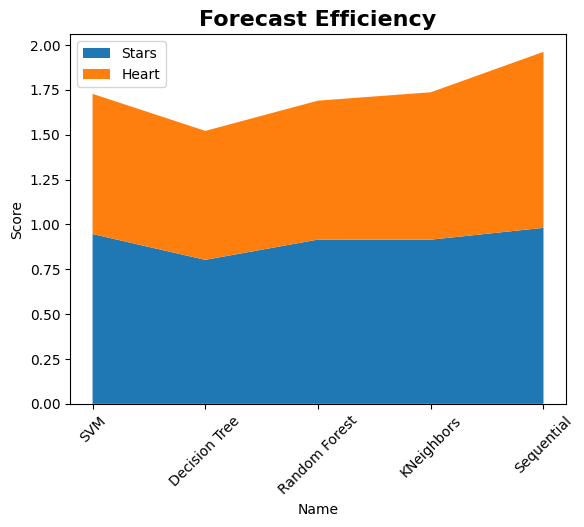

In [ ]:
names_of_approaches = ["SVM", "Decision Tree", "Random Forest", "KNeighbors", "Sequential"]
scores_of_approaches = [SVC_score, DTC_score, RFC_score, KN_score, SEQ_score]
scores_of_approaches_heart = [SVC_score_heart, DTC_score_heart, RFC_score_heart, KN_score_heart, SEQ_score]

plt.title("Forecast Efficiency", fontsize = 16, fontweight = "bold")
plt.stackplot(names_of_approaches, scores_of_approaches, scores_of_approaches_heart)
plt.legend(labels = ["Stars", "Heart"], loc = "upper left")
plt.xticks(names_of_approaches, rotation = 45)
plt.ylabel("Score")
plt.xlabel("Name")
plt.show()